# **Ridge Regularization**


### Ridge Regularization (L2 Regularization)

Ridge Regression is a technique used to prevent **overfitting** by adding a penalty term to the standard linear regression cost function. This penalty is proportional to the square of the magnitude of the coefficients.

### Cost Function
The objective function for Ridge Regression is:
$$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2$$

Where:
- **MSE($\theta$):** The Mean Squared Error (standard loss).
- **$\alpha$ (Alpha):** The regularization parameter (hyperparameter) that controls the strength of the penalty.
- **$\sum \theta_i^2$:** The L2 norm of the weight vector (excluding the bias term).

### Key Features:
- **Shrinkage:** It shrinks the coefficients towards zero, but unlike Lasso, it rarely sets them exactly to zero.
- **Multicollinearity:** It is highly effective when features are highly correlated.
- **Bias-Variance Trade-off:** By increasing $\alpha$, we increase bias but significantly reduce variance, leading to better generalization on unseen data.
 

There are 3 types of regularization : 

1. Ridge Regression (L2 Regularization)
2. Lasso Regression (L1 Regularization)
3. Elastic Net (ridge + lasso)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge         # to use Ridge regularization you have to import Ridge in 'linear_model'
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
X = data.data
y = data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(lr.coef_)
print(lr.intercept_)



[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [4]:
# using Ridge to make prediction

R = Ridge(alpha=10)     # by default alpha value is 1       # increase the value to 100000 and you will see overfitting but will throw huge error on test data set
# However, a standard starting range is usually 0.1, 1.0, or 10.0.

R.fit(X_train, y_train)
y_pred1 = R.predict(X_test)
    
print(lr.coef_)
print(lr.intercept_)


[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [5]:
# checking accuracy 


print("R2 score of linear model",r2_score(y_test, y_pred))
print("R2 score of ridge model",r2_score(y_test, y_pred1))

print("RMSE of linear model",np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE of ridge model",np.sqrt(mean_squared_error(y_test, y_pred1)))


R2 score of linear model 0.5188113124539249
R2 score of ridge model 0.18324524136176967
RMSE of linear model 48.72713760953252
RMSE of ridge model 63.48323251986342


What is Alpha ($\alpha$)?
In Scikit-Learn, the hyperparameter $\lambda$ is called alpha.

- alpha = 0: Typically makes it just Linear Regression (no penalty).
- Small alpha (e.g., 0.01, 0.1): Light regularization. Slightly reduces variance but keeps bias low.
- Large alpha (e.g., 10, 100): Strong regularization. Smashes coefficients ($w$) close to zero. This simplifies the model (High Bias) but significantly reduces Variance (prevents overfitting).

Trade-off: Increasing alpha moves the model from Overfitting $\to$ Optimal $\to$ Underfitting.


Increasing Alpha ($\alpha \uparrow$):
- Good: Reduces model complexity (shrinks coefficients). This cures Overfitting.
- Bad: If you increase it too much, the model becomes too simple to capture the pattern in the data (coefficients become almost zero). This causes Underfitting.

So, as Alpha goes Up: Variance Decreases, but Bias Increases. The goal is to find the "Goldilocks" alpha in the middle.





### Parameters used inside `Ridge()`

*   **`alpha`**: (float, default=1.0) Regularization strength; must be a positive float. Larger values specify stronger regularization, which reduces overfitting by shrinking the coefficients toward zero.
*   **`fit_intercept`**: (bool, default=True) Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
*   **`solver`**: (str, default='auto') The solver to use in the computational routines. Options include:
    *   `'auto'`: Chooses the solver automatically based on the data type.
    *   `'svd'`: Uses a Singular Value Decomposition.
    *   `'cholesky'`: Uses the standard `scipy.linalg.solve` function.
    *   `'sag'` / `'saga'`: Iterative procedures (Stochastic Average Gradient descent), efficient for large datasets.
*   **`max_iter`**: (int, default=None) Maximum number of iterations for conjugate gradient solver.
*   **`tol`**: (float, default=1e-4) The precision of the solution.
*   **`positive`**: (bool, default=False) When set to `True`, forces the coefficients to be positive. (Only supported by 'lbfgs' solver).
*   **`random_state`**: (int, default=None) Used when `solver` == 'sag' or 'saga' to shuffle the data.



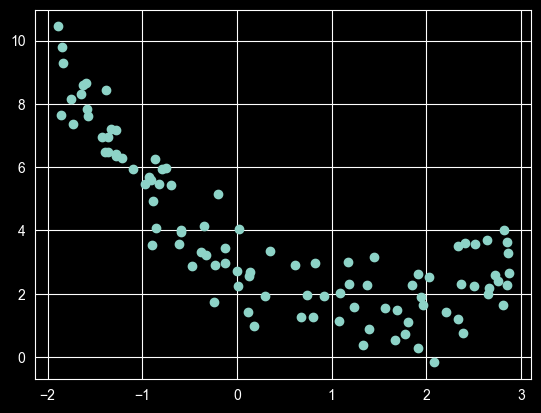

In [6]:
# plotting the graph
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

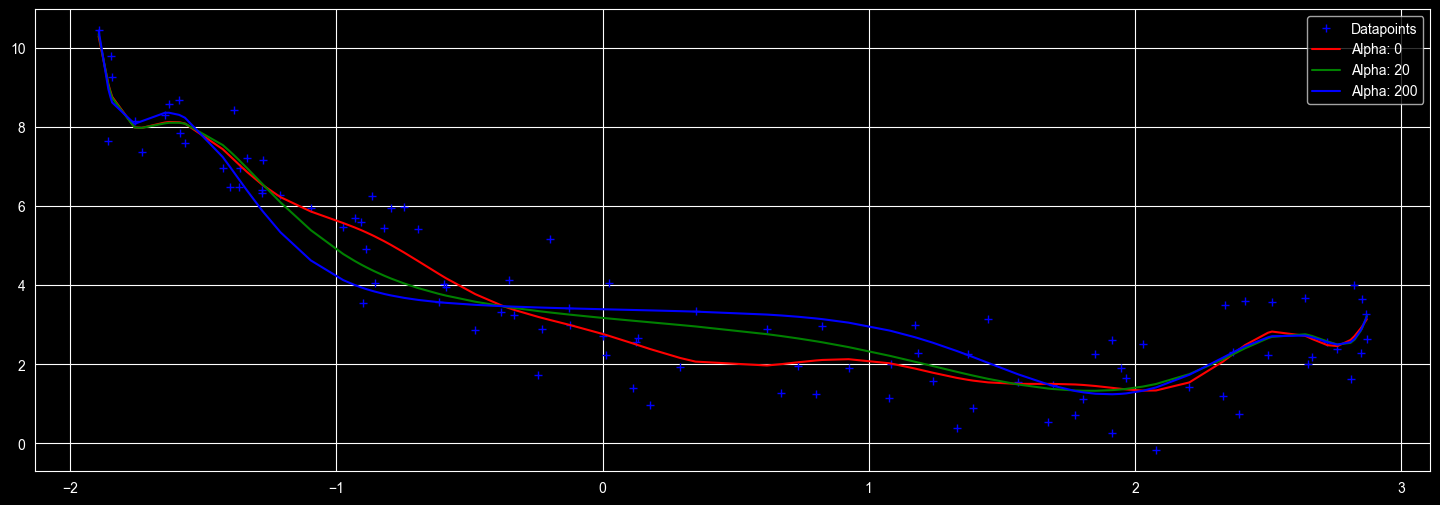

In [7]:
# from sklearn.preprocessing import PolynomialFeatures
# import the above to use polynomial features 

# plotting different model at different alpha values
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(18, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

- sorted(x1[:, 0]):
    - This sorts the X-axis values (inputs) from smallest to largest. If you don't do this, the line connects points in the random order they appear in the dataset, creating a scribbled mess instead of a clean curve.
- np.argsort(x1[:, 0]):
    - This function returns the indices that would sort the array x1. It tells you, "The smallest value is at index 5, the next is at index 2," and so on.
- preds[np.argsort(x1[:, 0])]:
    - This reorders the predictions (Y-axis) to match the sorted order of the X-axis.
Crucially, it ensures that the Y-prediction for the smallest X value comes first, then the Y for the second smallest X, etc.